### THE SPARK FOUNDATION

TASK No.1:-Prediction using Supervised model.

From:- Aditi Gogate.

###### first, we have to import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as son
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

###### After importing the required libraries, we will upload our data in our working library.

In [2]:
##Reading the data/Accessing the data
mydata=pd.read_csv("http://bit.ly/w-data")
mydata.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Any dataset on which we are going to work has to be complete. If there are some problems regarding the data it will cause problem afterwards.well our 1st concern towards data is that the data is complete or not.here we are going to check the null /missing values in given dataset.

In [4]:
mydata.isnull==True ## if it gives output as true then our dataset has missing values and if it gives the output as False then the dataset is complete.

False

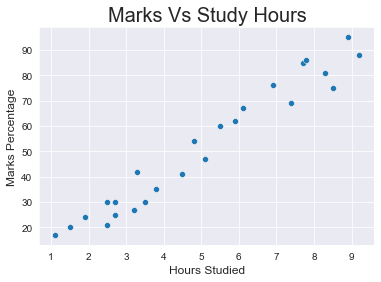

In [5]:
son.set_style('darkgrid')
son.scatterplot(y= mydata['Scores'], x= mydata['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

###### From above plot we can say that there is some relation between these two variables.So to confirm it let's add a regression line in the plot.

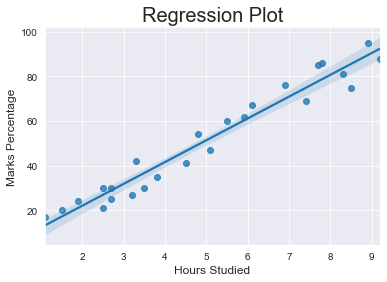

In [6]:
son.regplot(x= mydata['Hours'], y= mydata['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [7]:
print(mydata.corr()) # correlation between hours and scores

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


###### We can observe that the rregression plot is showing a positive relation between hours of study and marks of exam.And it is proven with our correlation.It is precisely good correlation coeffient.

### 1.splitting the data into training dataset and test dataset.

In [9]:
# Defining X and y from the Data
X = mydata.iloc[:, :-1].values  
y = mydata.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

###### 2.training the model

In [10]:
reg = LinearRegression()
reg.fit(train_X, train_y)
print("successfully trained")

successfully trained


###### 3.Predicting the Percentage of Marks

In [12]:
pred_y = reg.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


###### 4.Comparison of actual scores with predicted scores

In [13]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


###### 5.Accuracy 

In [15]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502486


###### on this note , we can conclude that our model is good fit as its mean absolute error is very small.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?


In [17]:
hours = [9.25]
answer = reg.predict([hours])
print("Score = {}".format(round(answer[0],3)))
hours = [9.25]
answer = reg.predict([hours])

Score = 93.893


### So our final conclusion is that if a student studies for 9.25 hours per day then that student can score approximately 93.894 .